# TASK2

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


Считываем файл

In [2]:
data = pd.read_excel('C:/Users/Administrator/Documents/python/predict.xlsx')
data.shape

(11004, 17)

In [3]:
data.head()

,Дата и время,Обороты двигателя (об/мин) 1,Обороты двигателя (об/мин) 2,Обороты двигателя (об/мин) 3,Вибрация подшипников (мкм) Подшипник 1,Вибрация подшипников (мкм) Подшипник 2,Вибрация подшипников (мкм) Подшипник 3,Сдвиг ротора (мм) Подшипник 1,Сдвиг ротора (мм) Подшипник 2,Сдвиг ротора (мм) Подшипник 3,Смазочное масло Давление масла 1 (кПа),Смазочное масло Давление масла 2 (кПа),Смазочное масло Температура масла (С),Температура газа (С) На входе компрессора,Температура газа (С) На выходе компрессора,Давление газа На входе компрессора (кПа),Давление газа На выходе компрессора (МПа)
0,2016-09-02 00:10:00,5258.662931,5258.780949,5255.826839,53.798579,28.936931,45.781854,-0.041063,-0.031354,0.004203,0.344716,0.340869,35.467580,23.744987,105.907962,38.161112,3.557595
1,2016-09-02 00:20:00,5277.254228,5277.860518,5274.922677,54.173565,28.835001,45.525913,-0.043171,-0.031549,0.000496,0.344712,0.340852,35.456034,23.127557,104.946009,39.077081,3.512745
2,2016-09-02 00:30:00,5331.892912,5332.584639,5329.195142,55.400938,28.720065,45.859280,-0.040885,-0.032023,-0.000016,0.344361,0.340497,35.528870,23.599861,106.309756,39.040205,3.559509
3,2016-09-02 00:40:00,5330.082210,5329.813639,5327.209481,56.015260,28.387437,46.192262,-0.039666,-0.031140,0.000731,0.344249,0.340410,35.691071,25.281874,106.444291,38.282403,3.529405
4,2016-09-02 00:50:00,5296.671570,5296.561670,5294.262691,54.256911,28.309788,46.751371,-0.037788,-0.031344,0.000329,0.344550,0.340711,35.712280,26.382340,107.349758,38.157705,3.548787


Проверяем есть ли пропущенные значения:

In [4]:
data.isnull().sum()

Дата и время                                  0
Обороты двигателя (об/мин) 1                  0
Обороты двигателя (об/мин) 2                  0
Обороты двигателя (об/мин) 3                  0
Вибрация подшипников (мкм) Подшипник 1        0
Вибрация подшипников (мкм) Подшипник 2        0
Вибрация подшипников (мкм) Подшипник 3        0
Сдвиг ротора (мм) Подшипник 1                 0
Сдвиг ротора (мм) Подшипник 2                 0
Сдвиг ротора (мм) Подшипник 3                 0
Смазочное масло Давление масла 1 (кПа)        0
Смазочное масло Давление масла 2 (кПа)        0
Смазочное масло Температура масла (С)         0
Температура газа (С) На входе компрессора     0
Температура газа (С) На выходе компрессора    0
Давление газа На входе компрессора (кПа)      0
Давление газа На выходе компрессора (МПа)     0
dtype: int64

Пропущенных значений нет.

# Модель для вибрации подшипника 1:

Так как мы также будем предсказывать значения вибрации подшипника 2 и 3 убираем их из модели. Их значения не будут регрессорами в нашей модели

In [5]:

data.dropna().shape
X = data.drop('Вибрация подшипников (мкм) Подшипник 1', 1)
X=X.drop('Вибрация подшипников (мкм) Подшипник 2',1)
X=X.drop('Вибрация подшипников (мкм) Подшипник 3',1)
y = data['Вибрация подшипников (мкм) Подшипник 1']

Переставляем значение искомой переменной в конец датафрейма(необязательно, просто для удобства)

In [6]:
data=data[['Дата и время','Обороты двигателя (об/мин) 1','Обороты двигателя (об/мин) 2','Обороты двигателя (об/мин) 3','Вибрация подшипников (мкм) Подшипник 2','Вибрация подшипников (мкм) Подшипник 3','Сдвиг ротора (мм) Подшипник 1','Сдвиг ротора (мм) Подшипник 2','Сдвиг ротора (мм) Подшипник 3','Смазочное масло Давление масла 1 (кПа)','Смазочное масло Давление масла 2 (кПа)','Смазочное масло Температура масла (С)','Температура газа (С) На входе компрессора','Температура газа (С) На выходе компрессора','Давление газа На входе компрессора (кПа)','Давление газа На выходе компрессора (МПа)','Вибрация подшипников (мкм) Подшипник 1']]

Посмотрим, как регрессоры зависят от предсказываемой переменной:

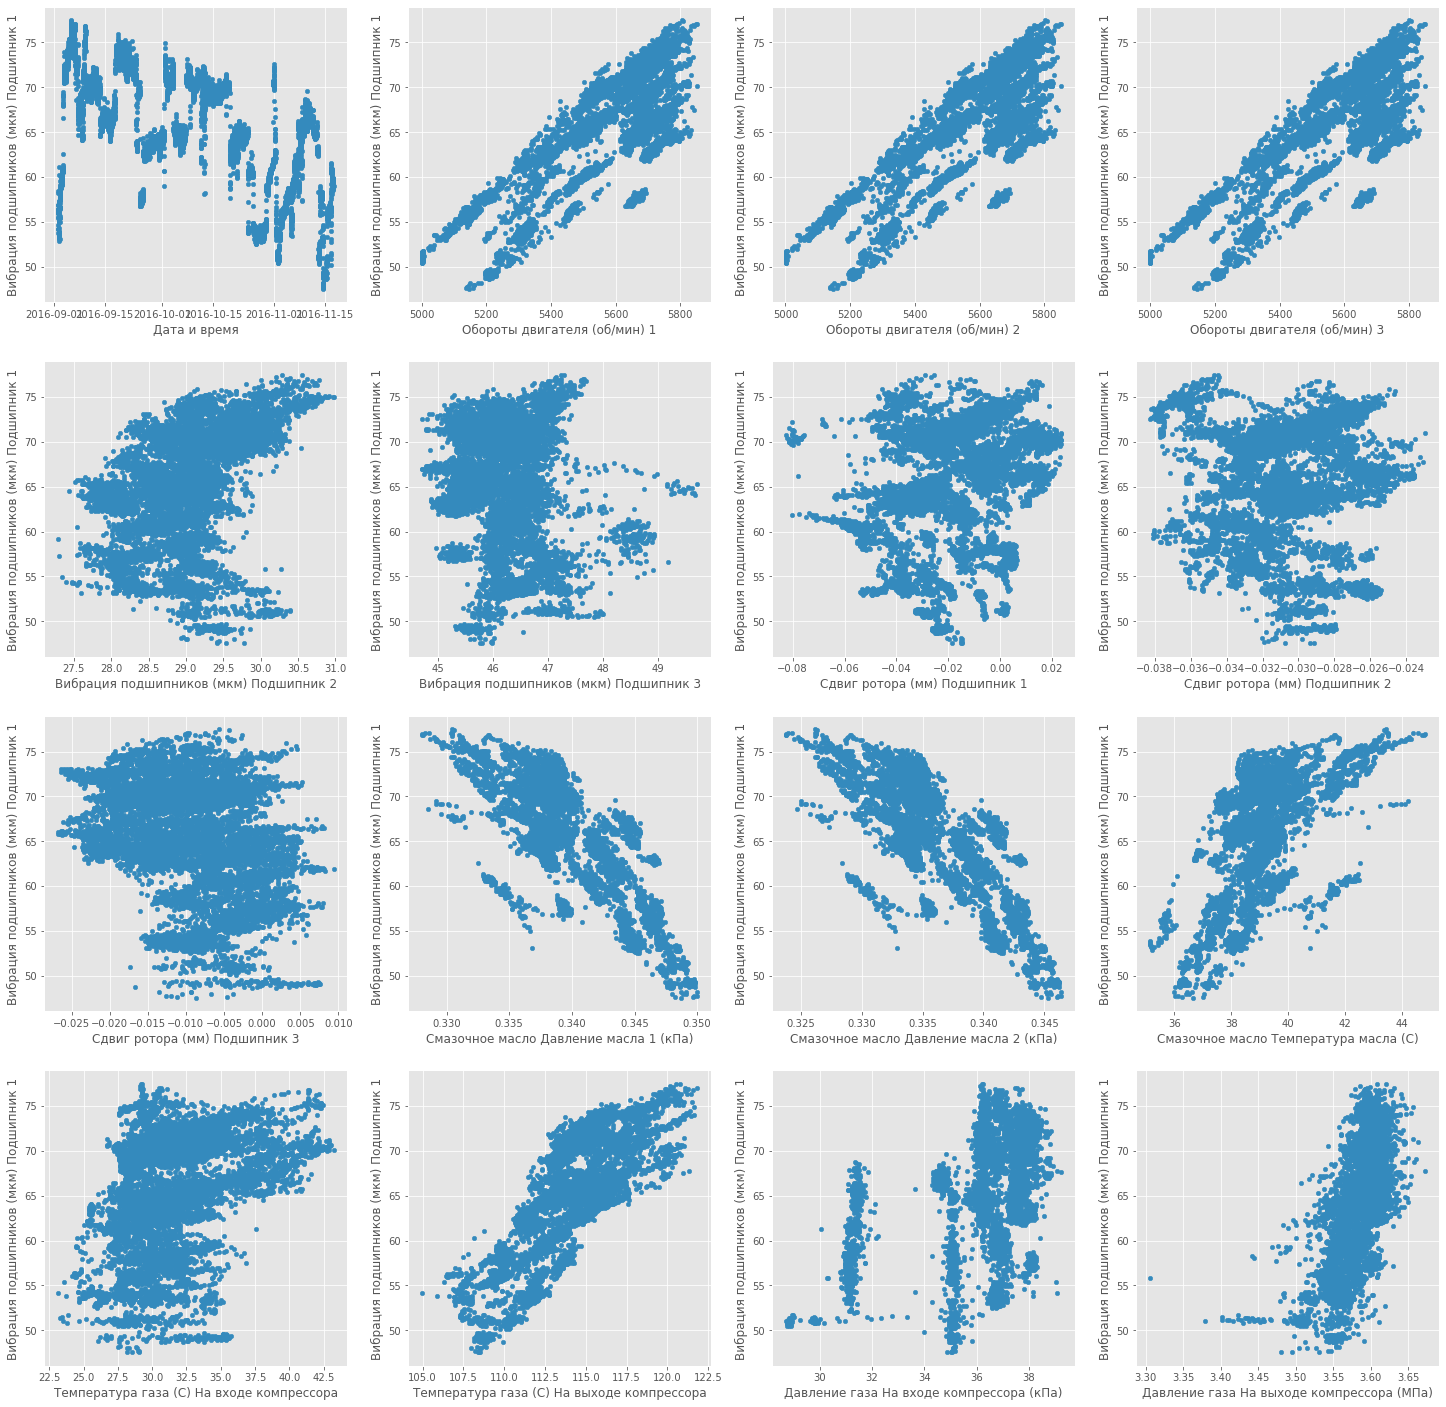

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(25, 25))
for idx, feature in enumerate(data.columns[:-1]):
    data.plot(feature, "Вибрация подшипников (мкм) Подшипник 1", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

Видно, что определенная зависимость прослеживается от всех оборотов двигателя, давления и температуры масла, температуры газа на выходе компрессора. Убедимся, что это так:

In [8]:
data[['Обороты двигателя (об/мин) 1', 'Обороты двигателя (об/мин) 2', 'Обороты двигателя (об/мин) 3', 'Вибрация подшипников (мкм) Подшипник 1','Сдвиг ротора (мм) Подшипник 1','Сдвиг ротора (мм) Подшипник 2','Сдвиг ротора (мм) Подшипник 3','Смазочное масло Давление масла 1 (кПа)','Смазочное масло Давление масла 2 (кПа)','Смазочное масло Температура масла (С)','Температура газа (С) На входе компрессора','Температура газа (С) На выходе компрессора','Давление газа На входе компрессора (кПа)','Давление газа На выходе компрессора (МПа)']].corr()

,Обороты двигателя (об/мин) 1,Обороты двигателя (об/мин) 2,Обороты двигателя (об/мин) 3,Вибрация подшипников (мкм) Подшипник 1,Сдвиг ротора (мм) Подшипник 1,Сдвиг ротора (мм) Подшипник 2,Сдвиг ротора (мм) Подшипник 3,Смазочное масло Давление масла 1 (кПа),Смазочное масло Давление масла 2 (кПа),Смазочное масло Температура масла (С),Температура газа (С) На входе компрессора,Температура газа (С) На выходе компрессора,Давление газа На входе компрессора (кПа),Давление газа На выходе компрессора (МПа)
Обороты двигателя (об/мин) 1,1.000000,0.999995,0.999997,0.769857,0.117735,0.229097,-0.304268,-0.824779,-0.825609,0.571267,0.437760,0.897604,0.659091,0.871948
Обороты двигателя (об/мин) 2,0.999995,1.000000,0.999997,0.769837,0.117549,0.228930,-0.304149,-0.824742,-0.825563,0.571276,0.437628,0.897557,0.659027,0.871966
Обороты двигателя (об/мин) 3,0.999997,0.999997,1.000000,0.769814,0.117647,0.229007,-0.304201,-0.824734,-0.825561,0.571268,0.437702,0.897586,0.659054,0.871951
Вибрация подшипников (мкм) Подшипник 1,0.769857,0.769837,0.769814,1.000000,0.249806,-0.030451,-0.284160,-0.778678,-0.777713,0.585732,0.364743,0.749038,0.410349,0.652334
Сдвиг ротора (мм) Подшипник 1,0.117735,0.117549,0.117647,0.249806,1.000000,0.348884,-0.149105,-0.016338,-0.027309,-0.232369,0.448700,0.133983,-0.037409,0.134053
Сдвиг ротора (мм) Подшипник 2,0.229097,0.228930,0.229007,-0.030451,0.348884,1.000000,-0.119435,0.069286,0.055805,-0.362921,0.372537,0.123076,0.407379,0.237212
Сдвиг ротора (мм) Подшипник 3,-0.304268,-0.304149,-0.304201,-0.284160,-0.149105,-0.119435,1.000000,0.241226,0.247193,-0.071971,-0.042722,-0.277055,-0.225204,-0.269437
Смазочное масло Давление масла 1 (кПа),-0.824779,-0.824742,-0.824734,-0.778678,-0.016338,0.069286,0.241226,1.000000,0.999622,-0.822657,-0.359029,-0.852959,-0.542818,-0.659958
Смазочное масло Давление масла 2 (кПа),-0.825609,-0.825563,-0.825561,-0.777713,-0.027309,0.055805,0.247193,0.999622,1.000000,-0.819466,-0.370220,-0.856853,-0.549617,-0.660510
Смазочное масло Температура масла (С),0.571267,0.571276,0.571268,0.585732,-0.232369,-0.362921,-0.071971,-0.822657,-0.819466,1.000000,0.186535,0.720929,0.330581,0.404391


Действительно, коэффициенты корелляции для этих переменных имеют максимальные значения. Но мы также можем видеть, что присутсвует сильная мультиколлинеарность (зависимость регрессоров друг от друга).Это может сказаться на качестве нашей модели. Попробуем построить модель линейной регрессии. Для этого разделим выборку на тренировочную(на ней будем учить модель) и тестовую(на ней будем проверять результат обучения). Предварительно перемешаем выборку:

In [9]:
from sklearn.utils import shuffle
X = shuffle(X, random_state=123)
y = shuffle(y, random_state=123)

from sklearn.model_selection import train_test_split
X_train_data, X_test_data, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)



Уберем переменную времени, так как она имеет тип даты и мы не можем работать с ней как с числовой переменной:

In [10]:
X_train= X_train_data.drop('Дата и время',1)
X_test= X_test_data.drop('Дата и время',1)
X_train.head()

,Обороты двигателя (об/мин) 1,Обороты двигателя (об/мин) 2,Обороты двигателя (об/мин) 3,Сдвиг ротора (мм) Подшипник 1,Сдвиг ротора (мм) Подшипник 2,Сдвиг ротора (мм) Подшипник 3,Смазочное масло Давление масла 1 (кПа),Смазочное масло Давление масла 2 (кПа),Смазочное масло Температура масла (С),Температура газа (С) На входе компрессора,Температура газа (С) На выходе компрессора,Давление газа На входе компрессора (кПа),Давление газа На выходе компрессора (МПа)
6915,5379.280553,5379.504387,5376.745605,-0.013278,-0.030210,0.002733,0.343150,0.339472,38.581543,34.041443,111.351256,36.232131,3.563750
9350,5244.352192,5245.316516,5242.008459,-0.009360,-0.033872,0.000516,0.345744,0.342160,37.687378,29.830048,110.157643,31.178403,3.551196
5710,5349.873877,5350.044748,5347.314444,-0.004213,-0.036255,-0.014631,0.341005,0.337292,38.173472,25.601766,112.447615,36.221540,3.512802
4205,5739.131639,5739.339199,5736.787898,-0.055298,-0.030208,-0.018087,0.337478,0.333618,39.160156,29.912383,115.990804,35.991638,3.611859
348,5747.159810,5748.124224,5744.270849,-0.038470,-0.037605,-0.006630,0.332548,0.328443,41.966197,30.577942,118.143010,37.098100,3.600025


In [11]:
from sklearn.linear_model import LinearRegression

Обучим модель линейной регрессии и выведем коэффициенты:

In [12]:
linearregressor = LinearRegression()
linearregressor.fit(X_train, y_train)
['{1} : {0}'.format(a, b) for a, b in zip(linearregressor.coef_, X_train.columns)]


['Обороты двигателя (об/мин) 1 : 0.20890155292418192',
 'Обороты двигателя (об/мин) 2 : 0.24169158231831211',
 'Обороты двигателя (об/мин) 3 : -0.4351554911072909',
 'Сдвиг ротора (мм) Подшипник 1 : 94.32390713210451',
 'Сдвиг ротора (мм) Подшипник 2 : -363.86623029257805',
 'Сдвиг ротора (мм) Подшипник 3 : -55.83267209227236',
 'Смазочное масло Давление масла 1 (кПа) : -5660.276622951792',
 'Смазочное масло Давление масла 2 (кПа) : 4916.706300117242',
 'Смазочное масло Температура масла (С) : 0.2296465354549468',
 'Температура газа (С) На входе компрессора : 0.009337087434858352',
 'Температура газа (С) На выходе компрессора : -0.0032028894358389105',
 'Давление газа На входе компрессора (кПа) : -0.022403517713595476',
 'Давление газа На выходе компрессора (МПа) : 1.0016085496097007']

Не забудем про свободный член:

In [13]:
linearregressor.intercept_

228.4492606012398

Оценим некоторые показатели качества нашей модели(метрики). В качестве метрик возьмем среднеквадратическую ошибку, абсолютную ошибку и коэффициент детерминации:

In [14]:
y_train_pred = linearregressor.predict(X_train)
y_test_pred = linearregressor.predict(X_test)
from sklearn.metrics import  mean_squared_error, r2_score, mean_absolute_error

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('MAE train: {:.3f}, test: {:.3f}'.format(
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 10.559, test: 10.412
MAE train: 2.746, test: 2.731
R^2 train: 0.732, test: 0.736


Параметры выдают неплохой результат, взглянем на реальные и предсказанные значения на тестововй выборке:

In [15]:

print (y_test)

2468    72.456886
1763    65.447642
4547    71.461272
7490    64.190942
3989    63.655619
          ...    
4129    64.850162
1988    66.009381
2250    67.547280
7321    63.888045
1455    69.427666
Name: Вибрация подшипников (мкм) Подшипник 1, Length: 3302, dtype: float64


In [16]:
y_test_pred = pd.DataFrame(data=y_test_pred)
print (y_test_pred)

              0
0     67.610019
1     68.062736
2     68.619763
3     63.471436
4     67.064182
...         ...
3297  67.302354
3298  68.430972
3299  69.797493
3300  63.700713
3301  71.621174

[3302 rows x 1 columns]


Значения похожи, но отличаются от реальных

Построим график экспериментальных и предсказанных значений тестовой выборки от времени:

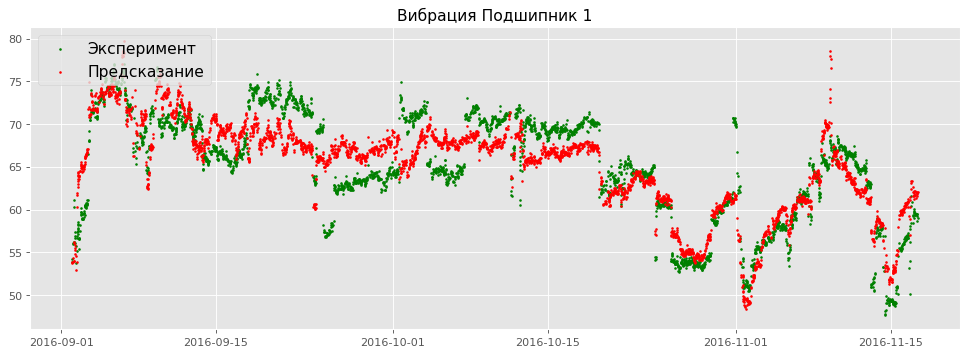

In [17]:
import matplotlib.pylab as plt
plt.figure(figsize=(15,5), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
plt.scatter(X_test_data['Дата и время'], y_test, color = 'green', label = 'Эксперимент', s = 3)
plt.scatter(X_test_data['Дата и время'], y_test_pred, color = 'red', label = 'Предсказание', s=3)
plt.title('Вибрация Подшипник 1', fontsize=14)
plt.legend(loc=2, prop={'size': 14})
plt.show()


Наша модель может иметь избыточные переменные, так как присутствует сильная мультиколлинеарность регрессоров. Мы можем попробовать убрать часть регрессоров и построить новую модель. Другим вариантом может служить использование L1 регуляризации. L1 регуляризация призвана не только штрафоать модель за большие коэффициенты и тем самым бороться с переобучением, но и может отсеить незначимые регрессоры.параметром L1 регуляризации является коффициент alpha. Нам нужно выбрать наилучшее alpha.

Для этого, во-первых, нам нужна метрика качества. Будем использовать в качестве метрики сам оптимизируемый функционал метода наименьших квадратов, то есть Mean Square Error.

Во-вторых, нужно понять, на каких данных эту метрику считать. Нельзя выбирать alpha по значению MSE на обучающей выборке, потому что тогда мы не сможем оценить, как модель будет делать предсказания на новых для нее данных. Если мы выберем одно разбиение выборки на обучающую и тестовую, то настроимся на конкретные "новые" данные, и вновь можем переобучиться. Поэтому будем делать несколько разбиений выборки, на каждом пробовать разные значения alpha, а затем усреднять MSE. Удобнее всего делать такие разбиения кросс-валидацией, то есть разделить выборку на K частей, или блоков, и каждый раз брать одну из них как тестовую, а из оставшихся блоков составлять обучающую выборку. 
Для этого будем использовать специальный регрессор, __LassoCV__, который берет на вход список из alpha и для каждого из них вычисляет MSE на кросс-валидации. После обучения (если оставить параметр cv=3 по умолчанию) регрессор будет содержать переменную __mse\_path\___, матрицу размера len(alpha) x k, k = 3 (число блоков в кросс-валидации), содержащую значения MSE на тесте для соответствующих запусков. Кроме того, в переменной alpha\_ будет храниться выбранное значение параметра регуляризации, а в coef\_, традиционно, обученные веса, соответствующие этому alpha_.



Выбранное alpha: 0.1
['Обороты двигателя (об/мин) 1 : 0.02460155474913368', 'Обороты двигателя (об/мин) 2 : 0.0', 'Обороты двигателя (об/мин) 3 : 0.0', 'Сдвиг ротора (мм) Подшипник 1 : 0.0', 'Сдвиг ротора (мм) Подшипник 2 : -0.0', 'Сдвиг ротора (мм) Подшипник 3 : -0.0', 'Смазочное масло Давление масла 1 (кПа) : -0.0', 'Смазочное масло Давление масла 2 (кПа) : -0.0', 'Смазочное масло Температура масла (С) : 1.0190480156816117', 'Температура газа (С) На входе компрессора : 0.07126800540719827', 'Температура газа (С) На выходе компрессора : 0.07445501178270862', 'Давление газа На входе компрессора (кПа) : -0.4414005564967841', 'Давление газа На выходе компрессора (МПа) : 0.0']


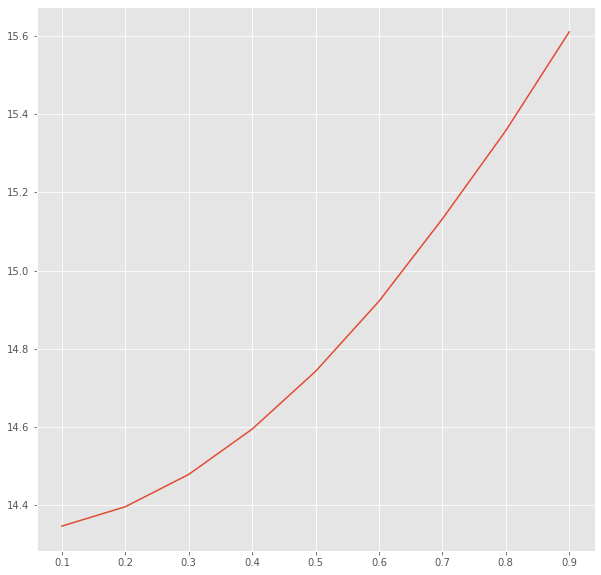

In [18]:
from sklearn.linear_model import LassoCV
alphas = np.arange(0.1, 1, 0.1)
lassocv_model = LassoCV(alphas=alphas)
lassocv_model.fit(X_train, y_train)
plt.figure(figsize=(10, 10))
p = plt.plot(lassocv_model.alphas_, lassocv_model.mse_path_.mean(axis=1))
ax = plt.axes()
print ('Выбранное alpha: {0}'.format(lassocv_model.alpha_))
zip(lassocv_model.coef_, X_train.columns)
print(['{1} : {0}'.format(a, b) for a, b in zip(lassocv_model.coef_, X_train.columns)])


Полученное значение alpha=0.1. Выведем срднее значение нашей метрики качества  и среднеквадратичное отклонение значений по кросс-валидации:

In [19]:
from sklearn.linear_model import Lasso
lasso_regressor = Lasso(alpha=0.1,random_state = 0)
lasso_regressor.fit(X_train, y_train)
lasso_predictions = lasso_regressor.predict(X_test)

In [20]:
from sklearn import model_selection, metrics
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)
lasso_scoring = model_selection.cross_val_score(lasso_regressor, X_train, y_train, scoring = scorer, cv = 10)
print('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 3.2950005641438076, std: 0.06782083576535601


Полученные значения хуже, чем если бы мы не проводили кросс-валидацию. Однако первая модель может неадекватно поисывтаь реальность, так как никак не справляется с зависимостью регрессоров. Для однозначного ответа на этот вопрос необходимы дальнейшие исследования.

In [21]:
print(lasso_regressor.coef_)

[ 0.02460155  0.          0.          0.         -0.         -0.
 -0.         -0.          1.01904802  0.07126801  0.07445501 -0.44140056
  0.        ]


In [22]:
lasso_regressor.intercept_

-106.05913646324873

Мы вывели коэффициенты модели линейной регрессии с L1 регуляризацией и видим, что часть коэффициентов занулились. выведем уравнение итоговой зависимости:

In [23]:
print ("Вибрация подшипника 1 = {:.2f}*Обороты двигателя (об/мин) 1 + {:.2f}*Смазочное масло Температура масла + {:.2f}*Температура газа (С) На входе компрессора+ {:.2f}*Температура газа (С) На выходе компрессора {:.2f}*Давление газа На входе компрессора+ {:.2f}".format(lasso_regressor.coef_[0], lasso_regressor.coef_[8], lasso_regressor.coef_[9],lasso_regressor.coef_[10],lasso_regressor.coef_[11],lasso_regressor.intercept_))
                                                

Вибрация подшипника 1 = 0.02*Обороты двигателя (об/мин) 1 + 1.02*Смазочное масло Температура масла + 0.07*Температура газа (С) На входе компрессора+ 0.07*Температура газа (С) На выходе компрессора -0.44*Давление газа На входе компрессора+ -106.06


Попробуем построить модель случайного леса для нашей задачи. Для этого, нам необходимо нормировать переменные. Так как модель случайного леса использует градиентный спуск, а он плохо работает, когда переменные имеют разные масштабы(размерности):

In [24]:
X=X.drop('Дата и время',1)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
X_std, y, test_size=0.3, random_state=0)

In [25]:
df1=pd.DataFrame(data=X_train_scaled)
df1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,7702.000000,7702.000000,7702.000000,7702.000000,7702.000000,7702.000000,7702.000000,7702.000000,7702.000000,7702.000000,7702.000000,7702.000000,7702.000000
mean,0.006568,0.006582,0.006567,-0.008861,-0.003323,0.002655,-0.008937,-0.008767,0.009819,0.008119,0.007932,0.008619,0.001510
std,1.000780,1.000793,1.000790,0.998400,0.994291,0.999781,1.001575,1.001628,1.005421,0.999666,1.004323,0.993168,0.998334
min,-3.085688,-3.082888,-3.082420,-3.352325,-2.705388,-2.612048,-3.114504,-3.109839,-3.337497,-2.441301,-3.055702,-3.858432,-11.190569
25%,-0.526466,-0.526279,-0.525748,-0.693520,-0.654808,-0.702098,-0.604162,-0.591348,-0.526103,-0.733971,-0.564047,0.003914,-0.500990
50%,0.256470,0.255163,0.254948,-0.072062,-0.038640,0.054684,-0.324822,-0.324786,0.019213,-0.178002,-0.013212,0.140932,0.216616
75%,0.796777,0.797549,0.797534,0.691191,0.698259,0.725164,0.729253,0.742298,0.387981,0.563653,0.579490,0.675851,0.701590
max,1.680627,1.682232,1.679982,2.367142,2.741477,2.785659,2.629948,2.596628,4.985278,3.541988,3.041669,1.646207,2.811358


Обучим модель. Ограничим максимальную глубину дерева 10 пунктами.

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth = 10, random_state = 1)
rf.fit(X_train_scaled, y_train)

In [28]:
y_train_pred_forest = rf.predict(X_train_scaled)
y_test_pred_forest = rf.predict(X_test_scaled)

Оценим метрики качества модели:

In [29]:
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred_forest),
        mean_squared_error(y_test, y_test_pred_forest)))
print('MAE train: {:.3f}, test: {:.3f}'.format(
        mean_absolute_error(y_train, y_train_pred_forest),
        mean_absolute_error(y_test, y_test_pred_forest)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred_forest),
        r2_score(y_test, y_test_pred_forest)))

MSE train: 0.832, test: 1.167
MAE train: 0.493, test: 0.595
R^2 train: 0.979, test: 0.970


Мы видим, что значения ошибок гораздо ниже, а коэффициент детерминации(определенности нашей модели) близок к единице. Построим график реальных и предсказанных значений от времени для тестовой выборки:

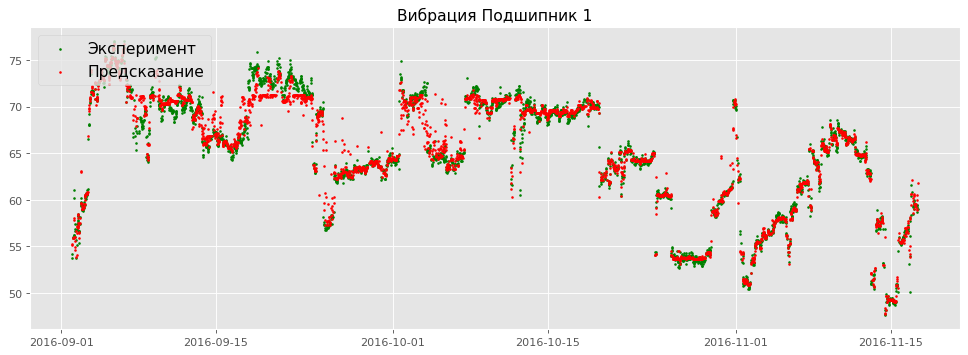

In [30]:
import matplotlib.pylab as plt
plt.figure(figsize=(15,5), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
plt.scatter(X_test_data['Дата и время'], y_test, color = 'green', label = 'Эксперимент', s = 3)
plt.scatter(X_test_data['Дата и время'], y_test_pred_forest, color = 'red', label = 'Предсказание', s=3)
plt.title('Вибрация Подшипник 1', fontsize=14)
plt.legend(loc=2, prop={'size': 14})
plt.show()

Сравним линейную модель без регуляризации и случайный лес. Для этого вычтем случайного леса из абсолютной ошибки линейной регрессии и построим гистограмму:

Text(0.5, 0, 'Difference of absolute errors')

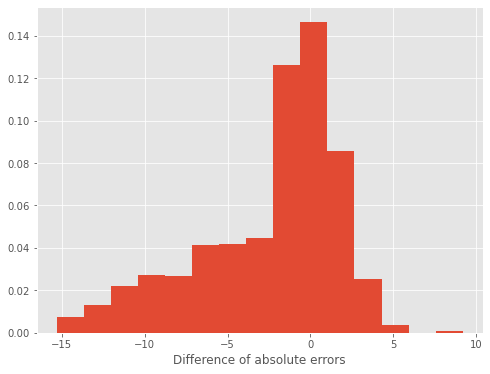

In [31]:
plt.figure(figsize(8,6))
plt.hist(abs(y_test - linearregressor.predict(X_test)) - abs(y_test - rf.predict(X_test)), bins=15, density=True)
plt.xlabel('Difference of absolute errors')

Используем t критерий для оценки того, различаются ли среднии значения для разности ошибок в этом случае. Нулевая гипотеза- не различаются.

In [32]:
import statsmodels.stats.api as sm
tmeans = sm.CompareMeans(sm.DescrStatsW(abs(y_test - linearregressor.predict(X_test))), sm.DescrStatsW(abs(y_test - rf.predict(X_test_scaled))))

tmeans.ttest_ind(alternative='two-sided', usevar='pooled', value=0)[1]

0.0

Отвергаем нулевую гипотезу на всех уровнях значимости. Средние значения для разности абсолютных ошибок отличаются. Построим для них 95% доверительный интервал:

In [33]:
tmeans.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled')

(2.0692816319553873, 2.2017235770159886)

То есть, используя вместо линейной регрессии наш случайный лес, мы предсказываем вибрацию в среднем на 2.07-2.20 микрометров точнее.

Давайте посмотрим, какие признаки обладают наибольшей предсказательной способностью:

In [34]:
importances = pd.DataFrame(zip(X.columns, rf.feature_importances_))
importances.columns = ['feature name', 'importance']
importances.sort_values(by='importance', ascending=False)

,feature name,importance
2,Обороты двигателя (об/мин) 3,0.276170
0,Обороты двигателя (об/мин) 1,0.182603
1,Обороты двигателя (об/мин) 2,0.150655
6,Смазочное масло Давление масла 1 (кПа),0.096564
3,Сдвиг ротора (мм) Подшипник 1,0.079780
7,Смазочное масло Давление масла 2 (кПа),0.069690
8,Смазочное масло Температура масла (С),0.055788
5,Сдвиг ротора (мм) Подшипник 3,0.025912
11,Давление газа На входе компрессора (кПа),0.019418
10,Температура газа (С) На выходе компрессора,0.019367


Полученная модель гораздо точнее предсказывает значения вибрации. Однако, модель случайного леса подвержена переобучению. Мы видим, что наибольшие значения коэффициентов имеют сильно кореллирующие регрессоры. По мнению автора работы, следует проверить модель еще на каких-то данных, прежде чем делать вывод о том, что она подходит.

Проделаем тоже самое для вибраций подшипника 2 и 3.

# Модель для вибрации подшипника 2:

In [35]:

data.dropna().shape
X = data.drop('Вибрация подшипников (мкм) Подшипник 1', 1)
X=X.drop('Вибрация подшипников (мкм) Подшипник 2',1)
X=X.drop('Вибрация подшипников (мкм) Подшипник 3',1)
y = data['Вибрация подшипников (мкм) Подшипник 2']

In [36]:
data=data[['Дата и время','Обороты двигателя (об/мин) 1','Обороты двигателя (об/мин) 2','Обороты двигателя (об/мин) 3','Вибрация подшипников (мкм) Подшипник 1','Вибрация подшипников (мкм) Подшипник 3','Сдвиг ротора (мм) Подшипник 1','Сдвиг ротора (мм) Подшипник 2','Сдвиг ротора (мм) Подшипник 3','Смазочное масло Давление масла 1 (кПа)','Смазочное масло Давление масла 2 (кПа)','Смазочное масло Температура масла (С)','Температура газа (С) На входе компрессора','Температура газа (С) На выходе компрессора','Давление газа На входе компрессора (кПа)','Давление газа На выходе компрессора (МПа)','Вибрация подшипников (мкм) Подшипник 2']]

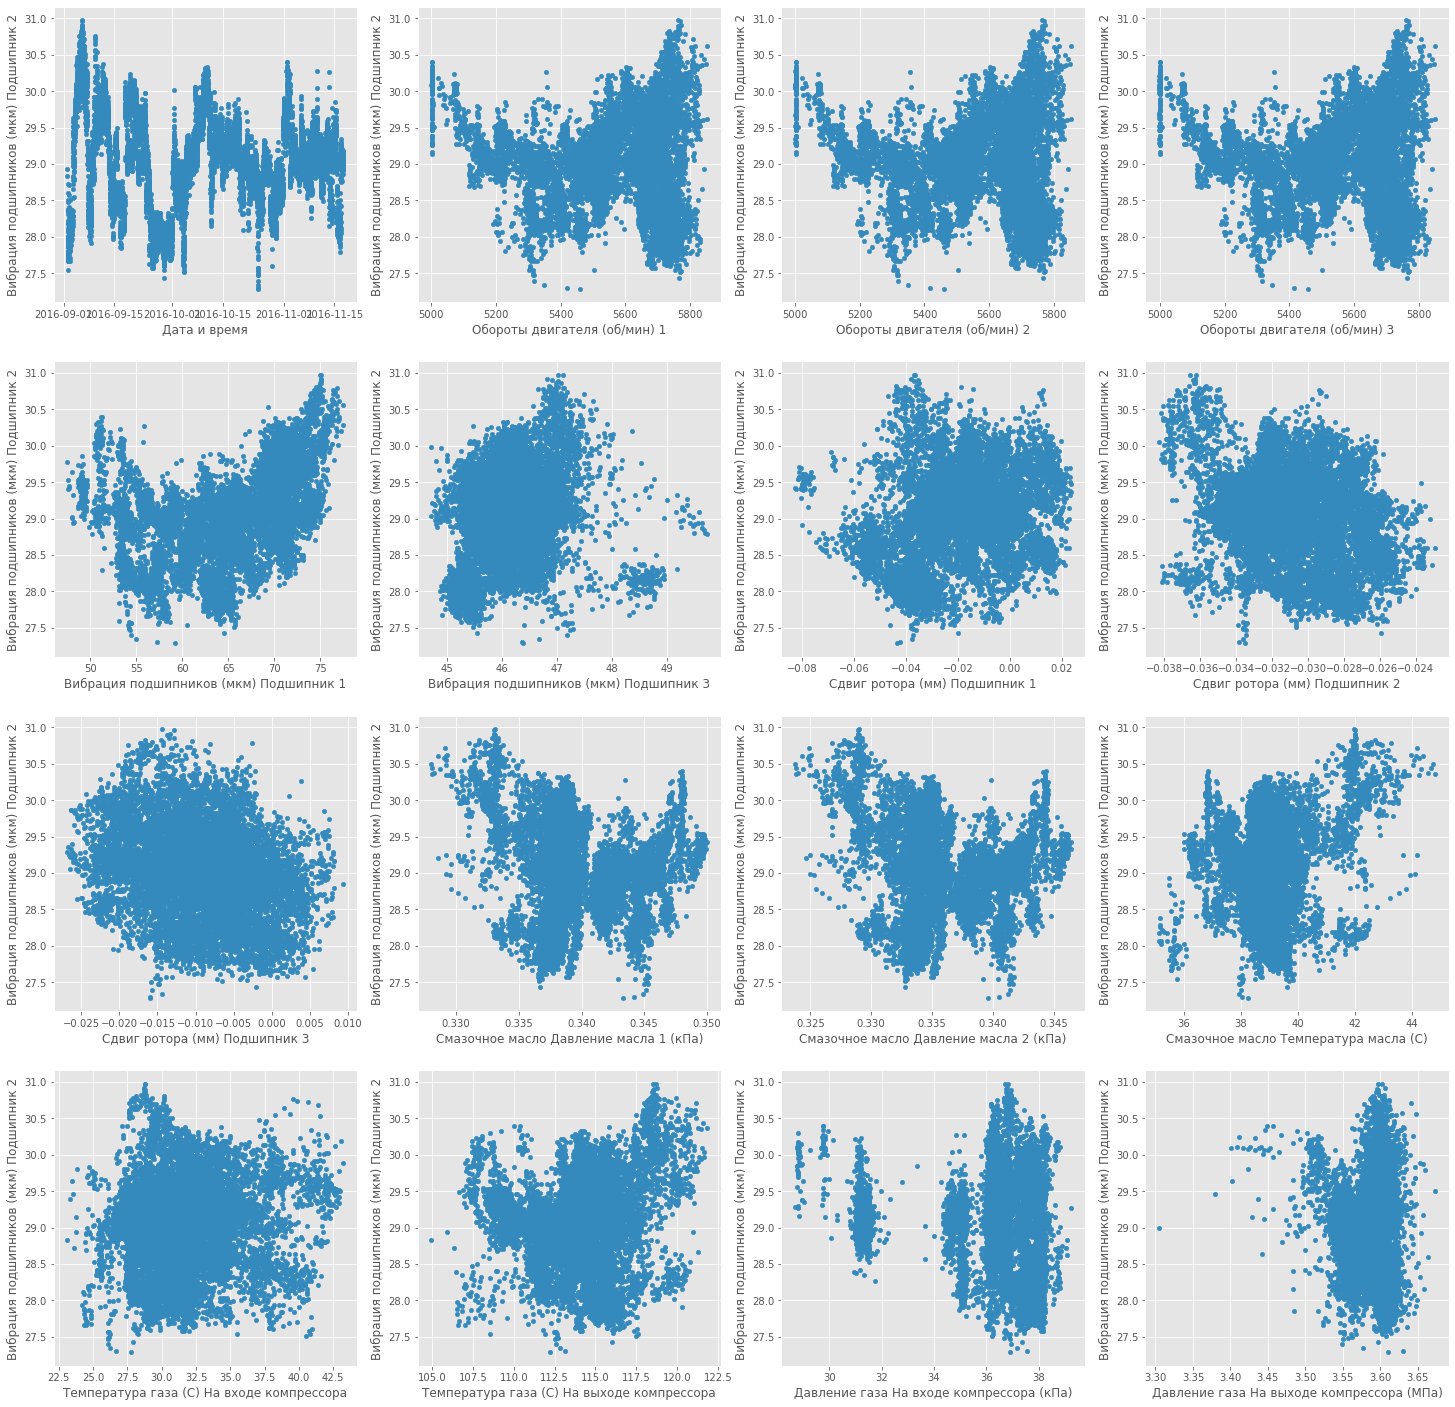

In [37]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(25, 25))
for idx, feature in enumerate(data.columns[:-1]):
    data.plot(feature, "Вибрация подшипников (мкм) Подшипник 2", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

Полученные зависимости имеют мало общего с зависимости для Подшипника 1. Стоит так же отметить, интересную периодичность от времени

In [38]:
data[['Обороты двигателя (об/мин) 1', 'Обороты двигателя (об/мин) 2', 'Обороты двигателя (об/мин) 3', 'Вибрация подшипников (мкм) Подшипник 2','Сдвиг ротора (мм) Подшипник 1','Сдвиг ротора (мм) Подшипник 2','Сдвиг ротора (мм) Подшипник 3','Смазочное масло Давление масла 1 (кПа)','Смазочное масло Давление масла 2 (кПа)','Смазочное масло Температура масла (С)','Температура газа (С) На входе компрессора','Температура газа (С) На выходе компрессора','Давление газа На входе компрессора (кПа)','Давление газа На выходе компрессора (МПа)']].corr()

,Обороты двигателя (об/мин) 1,Обороты двигателя (об/мин) 2,Обороты двигателя (об/мин) 3,Вибрация подшипников (мкм) Подшипник 2,Сдвиг ротора (мм) Подшипник 1,Сдвиг ротора (мм) Подшипник 2,Сдвиг ротора (мм) Подшипник 3,Смазочное масло Давление масла 1 (кПа),Смазочное масло Давление масла 2 (кПа),Смазочное масло Температура масла (С),Температура газа (С) На входе компрессора,Температура газа (С) На выходе компрессора,Давление газа На входе компрессора (кПа),Давление газа На выходе компрессора (МПа)
Обороты двигателя (об/мин) 1,1.000000,0.999995,0.999997,0.017114,0.117735,0.229097,-0.304268,-0.824779,-0.825609,0.571267,0.437760,0.897604,0.659091,0.871948
Обороты двигателя (об/мин) 2,0.999995,1.000000,0.999997,0.017035,0.117549,0.228930,-0.304149,-0.824742,-0.825563,0.571276,0.437628,0.897557,0.659027,0.871966
Обороты двигателя (об/мин) 3,0.999997,0.999997,1.000000,0.017073,0.117647,0.229007,-0.304201,-0.824734,-0.825561,0.571268,0.437702,0.897586,0.659054,0.871951
Вибрация подшипников (мкм) Подшипник 2,0.017114,0.017035,0.017073,1.000000,0.246212,-0.291669,-0.278784,-0.158441,-0.161781,0.202542,0.080034,0.146296,-0.134746,-0.037598
Сдвиг ротора (мм) Подшипник 1,0.117735,0.117549,0.117647,0.246212,1.000000,0.348884,-0.149105,-0.016338,-0.027309,-0.232369,0.448700,0.133983,-0.037409,0.134053
Сдвиг ротора (мм) Подшипник 2,0.229097,0.228930,0.229007,-0.291669,0.348884,1.000000,-0.119435,0.069286,0.055805,-0.362921,0.372537,0.123076,0.407379,0.237212
Сдвиг ротора (мм) Подшипник 3,-0.304268,-0.304149,-0.304201,-0.278784,-0.149105,-0.119435,1.000000,0.241226,0.247193,-0.071971,-0.042722,-0.277055,-0.225204,-0.269437
Смазочное масло Давление масла 1 (кПа),-0.824779,-0.824742,-0.824734,-0.158441,-0.016338,0.069286,0.241226,1.000000,0.999622,-0.822657,-0.359029,-0.852959,-0.542818,-0.659958
Смазочное масло Давление масла 2 (кПа),-0.825609,-0.825563,-0.825561,-0.161781,-0.027309,0.055805,0.247193,0.999622,1.000000,-0.819466,-0.370220,-0.856853,-0.549617,-0.660510
Смазочное масло Температура масла (С),0.571267,0.571276,0.571268,0.202542,-0.232369,-0.362921,-0.071971,-0.822657,-0.819466,1.000000,0.186535,0.720929,0.330581,0.404391


In [39]:
from sklearn.utils import shuffle
X = shuffle(X, random_state=123)
y = shuffle(y, random_state=123)

from sklearn.model_selection import train_test_split
X_train_data, X_test_data, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)

In [40]:
X_train= X_train_data.drop('Дата и время',1)
X_test= X_test_data.drop('Дата и время',1)
X_train.head()

,Обороты двигателя (об/мин) 1,Обороты двигателя (об/мин) 2,Обороты двигателя (об/мин) 3,Сдвиг ротора (мм) Подшипник 1,Сдвиг ротора (мм) Подшипник 2,Сдвиг ротора (мм) Подшипник 3,Смазочное масло Давление масла 1 (кПа),Смазочное масло Давление масла 2 (кПа),Смазочное масло Температура масла (С),Температура газа (С) На входе компрессора,Температура газа (С) На выходе компрессора,Давление газа На входе компрессора (кПа),Давление газа На выходе компрессора (МПа)
6915,5379.280553,5379.504387,5376.745605,-0.013278,-0.030210,0.002733,0.343150,0.339472,38.581543,34.041443,111.351256,36.232131,3.563750
9350,5244.352192,5245.316516,5242.008459,-0.009360,-0.033872,0.000516,0.345744,0.342160,37.687378,29.830048,110.157643,31.178403,3.551196
5710,5349.873877,5350.044748,5347.314444,-0.004213,-0.036255,-0.014631,0.341005,0.337292,38.173472,25.601766,112.447615,36.221540,3.512802
4205,5739.131639,5739.339199,5736.787898,-0.055298,-0.030208,-0.018087,0.337478,0.333618,39.160156,29.912383,115.990804,35.991638,3.611859
348,5747.159810,5748.124224,5744.270849,-0.038470,-0.037605,-0.006630,0.332548,0.328443,41.966197,30.577942,118.143010,37.098100,3.600025


In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
linearregressor = LinearRegression()
linearregressor.fit(X_train, y_train)
['{1} : {0}'.format(a, b) for a, b in zip(linearregressor.coef_, X_train.columns)]

['Обороты двигателя (об/мин) 1 : 0.021978788704641376',
 'Обороты двигателя (об/мин) 2 : 0.012162966982234381',
 'Обороты двигателя (об/мин) 3 : -0.034729087820182816',
 'Сдвиг ротора (мм) Подшипник 1 : 10.642185070491976',
 'Сдвиг ротора (мм) Подшипник 2 : -93.41094491463676',
 'Сдвиг ротора (мм) Подшипник 3 : -24.912651095972944',
 'Смазочное масло Давление масла 1 (кПа) : 775.4272230576904',
 'Смазочное масло Давление масла 2 (кПа) : -752.5850813802089',
 'Смазочное масло Температура масла (С) : 0.0630158162869112',
 'Температура газа (С) На входе компрессора : 0.004582849946014652',
 'Температура газа (С) На выходе компрессора : 0.04393486361379478',
 'Давление газа На входе компрессора (кПа) : -0.01238872509585382',
 'Давление газа На выходе компрессора (МПа) : -2.28875098356921']

In [43]:
linearregressor.intercept_

19.690190002093033

In [44]:
y_train_pred = linearregressor.predict(X_train)
y_test_pred = linearregressor.predict(X_test)
from sklearn.metrics import  mean_squared_error, r2_score, mean_absolute_error

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('MAE train: {:.3f}, test: {:.3f}'.format(
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.249, test: 0.243
MAE train: 0.401, test: 0.393
R^2 train: 0.354, test: 0.344


In [ ]:
Полученная линейная регрессия очень слабо описывает искомую зависимость. Коэффициент детерминации близок к нулю.

In [45]:
print (y_test)

2468    29.861968
1763    28.618218
4547    28.328874
7490    28.894090
3989    28.093611
          ...    
4129    27.949692
1988    28.586268
2250    28.274025
7321    28.992998
1455    29.677386
Name: Вибрация подшипников (мкм) Подшипник 2, Length: 3302, dtype: float64


In [46]:
y_test_pred = pd.DataFrame(data=y_test_pred)
print (y_test_pred)

              0
0     29.174102
1     29.147848
2     28.715815
3     29.003763
4     28.505973
...         ...
3297  28.274580
3298  28.688611
3299  28.859623
3300  29.032608
3301  29.814538

[3302 rows x 1 columns]


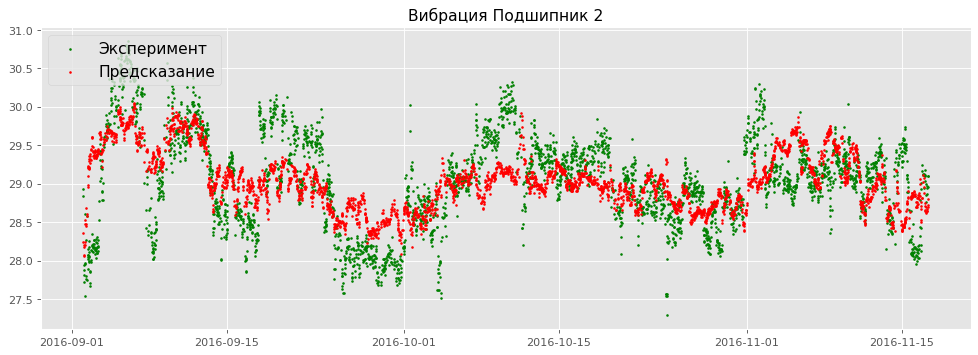

In [47]:
import matplotlib.pylab as plt
plt.figure(figsize=(15,5), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
plt.scatter(X_test_data['Дата и время'], y_test, color = 'green', label = 'Эксперимент', s = 3)
plt.scatter(X_test_data['Дата и время'], y_test_pred, color = 'red', label = 'Предсказание', s=3)
plt.title('Вибрация Подшипник 2', fontsize=14)
plt.legend(loc=2, prop={'size': 14})
plt.show()

Выбранное alpha: 0.01
['Обороты двигателя (об/мин) 1 : -0.0012348894457969773', 'Обороты двигателя (об/мин) 2 : -2.10430586291134e-05', 'Обороты двигателя (об/мин) 3 : -0.0', 'Сдвиг ротора (мм) Подшипник 1 : 0.0', 'Сдвиг ротора (мм) Подшипник 2 : -0.0', 'Сдвиг ротора (мм) Подшипник 3 : -0.0', 'Смазочное масло Давление масла 1 (кПа) : -0.0', 'Смазочное масло Давление масла 2 (кПа) : -0.0', 'Смазочное масло Температура масла (С) : 0.0677783430888616', 'Температура газа (С) На входе компрессора : 0.0070545220566830425', 'Температура газа (С) На выходе компрессора : 0.11265830405681537', 'Давление газа На входе компрессора (кПа) : -0.062099869693702986', 'Давление газа На выходе компрессора (МПа) : -0.0']


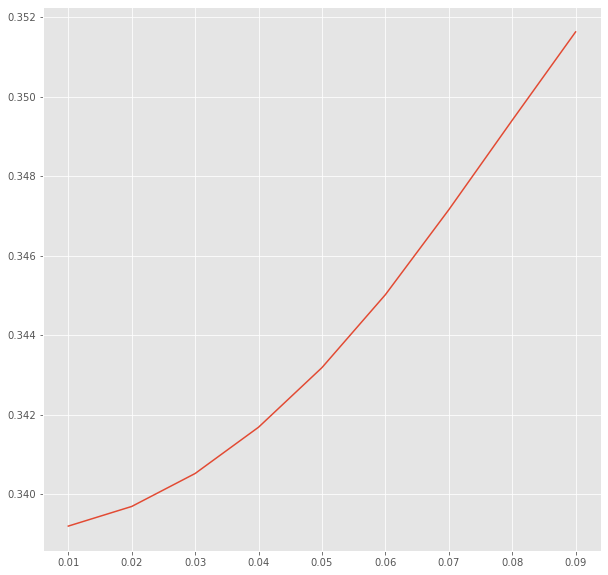

In [63]:
from sklearn.linear_model import LassoCV
alphas = np.arange(0.01, 0.1, 0.01)
lassocv_model = LassoCV(alphas=alphas)
lassocv_model.fit(X_train, y_train)
plt.figure(figsize=(10, 10))
p = plt.plot(lassocv_model.alphas_, lassocv_model.mse_path_.mean(axis=1))
ax = plt.axes()
print ('Выбранное alpha: {0}'.format(lassocv_model.alpha_))
zip(lassocv_model.coef_, X_train.columns)
print(['{1} : {0}'.format(a, b) for a, b in zip(lassocv_model.coef_, X_train.columns)])

In [65]:
from sklearn.linear_model import Lasso
lasso_regressor = Lasso(alpha=0.01,random_state = 0)
lasso_regressor.fit(X_train, y_train)
lasso_predictions = lasso_regressor.predict(X_test)

In [66]:
from sklearn import model_selection, metrics
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)
lasso_scoring = model_selection.cross_val_score(lasso_regressor, X_train, y_train, scoring = scorer, cv = 10)
print('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 0.4715235899143355, std: 0.007489042004700848


In [67]:
print(lasso_regressor.coef_)

[-1.23488945e-03 -2.10430586e-05 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  6.77783431e-02  7.05452206e-03  1.12658304e-01 -6.20998697e-02
 -0.00000000e+00]


Лассо регуляризация ничем не помогла. Линейная регрессия не подходит для описания зависимости для второго подшипника. Попробуем модель случайного леса.

In [68]:
X=X.drop('Дата и время',1)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
X_std, y, test_size=0.3, random_state=0)

In [69]:
df1=pd.DataFrame(data=X_train_scaled)
df1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,7702.000000,7702.000000,7702.000000,7702.000000,7702.000000,7702.000000,7702.000000,7702.000000,7702.000000,7702.000000,7702.000000,7702.000000,7702.000000
mean,0.006568,0.006582,0.006567,-0.008861,-0.003323,0.002655,-0.008937,-0.008767,0.009819,0.008119,0.007932,0.008619,0.001510
std,1.000780,1.000793,1.000790,0.998400,0.994291,0.999781,1.001575,1.001628,1.005421,0.999666,1.004323,0.993168,0.998334
min,-3.085688,-3.082888,-3.082420,-3.352325,-2.705388,-2.612048,-3.114504,-3.109839,-3.337497,-2.441301,-3.055702,-3.858432,-11.190569
25%,-0.526466,-0.526279,-0.525748,-0.693520,-0.654808,-0.702098,-0.604162,-0.591348,-0.526103,-0.733971,-0.564047,0.003914,-0.500990
50%,0.256470,0.255163,0.254948,-0.072062,-0.038640,0.054684,-0.324822,-0.324786,0.019213,-0.178002,-0.013212,0.140932,0.216616
75%,0.796777,0.797549,0.797534,0.691191,0.698259,0.725164,0.729253,0.742298,0.387981,0.563653,0.579490,0.675851,0.701590
max,1.680627,1.682232,1.679982,2.367142,2.741477,2.785659,2.629948,2.596628,4.985278,3.541988,3.041669,1.646207,2.811358


In [70]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth = 10, random_state = 1)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, random_state=1)

In [71]:
y_train_pred_forest = rf.predict(X_train_scaled)
y_test_pred_forest = rf.predict(X_test_scaled)

In [72]:
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred_forest),
        mean_squared_error(y_test, y_test_pred_forest)))
print('MAE train: {:.3f}, test: {:.3f}'.format(
        mean_absolute_error(y_train, y_train_pred_forest),
        mean_absolute_error(y_test, y_test_pred_forest)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred_forest),
        r2_score(y_test, y_test_pred_forest)))

MSE train: 0.031, test: 0.043
MAE train: 0.131, test: 0.153
R^2 train: 0.920, test: 0.885


Снова результат гораздо выше, хотя опять есть переобучение.

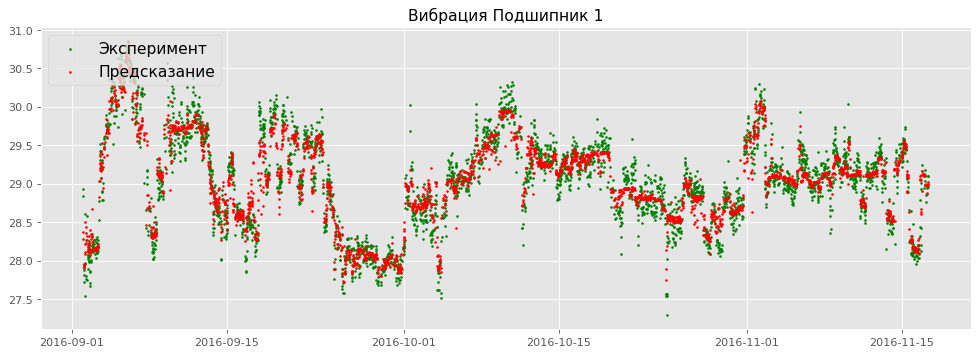

In [80]:
import matplotlib.pylab as plt
plt.figure(figsize=(15,5), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
plt.scatter(X_test_data['Дата и время'], y_test, color = 'green', label = 'Эксперимент', s = 3)
plt.scatter(X_test_data['Дата и время'], y_test_pred_forest, color = 'red', label = 'Предсказание', s=3)
plt.title('Вибрация Подшипник 1', fontsize=14)
plt.legend(loc=2, prop={'size': 14})
plt.show()

Text(0.5, 0, 'Difference of absolute errors')

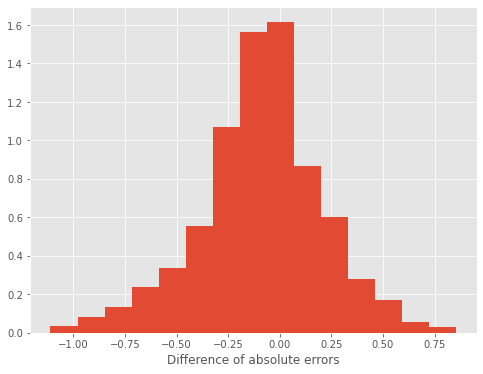

In [81]:
plt.figure(figsize(8,6))
plt.hist(abs(y_test - linearregressor.predict(X_test)) - abs(y_test - rf.predict(X_test)), bins=15, density=True)
plt.xlabel('Difference of absolute errors')

In [82]:
import statsmodels.stats.api as sm
tmeans = sm.CompareMeans(sm.DescrStatsW(abs(y_test - linearregressor.predict(X_test))), sm.DescrStatsW(abs(y_test - rf.predict(X_test_scaled))))

tmeans.ttest_ind(alternative='two-sided', usevar='pooled', value=0)[1]

0.0

Отвергаем нулевую гипотезу на всех уровнях значимости. Средние значения для разности абсолютных ошибок отличаются. Построим для них 95% доверительный интервал:

In [76]:
tmeans.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled')

(0.22870767140055728, 0.2511423560614802)

То есть, используя вместо линейной регрессии наш случайный лес, мы предсказываем вибрацию в среднем на 0.23-0.25 микрометров точнее.

Давайте посмотрим, какие признаки обладают наибольшей предсказательной способностью:

In [77]:
importances = pd.DataFrame(zip(X.columns, rf.feature_importances_))
importances.columns = ['feature name', 'importance']
importances.sort_values(by='importance', ascending=False)

,feature name,importance
3,Сдвиг ротора (мм) Подшипник 1,0.238332
7,Смазочное масло Давление масла 2 (кПа),0.125950
4,Сдвиг ротора (мм) Подшипник 2,0.118516
11,Давление газа На входе компрессора (кПа),0.110017
10,Температура газа (С) На выходе компрессора,0.092426
5,Сдвиг ротора (мм) Подшипник 3,0.065130
6,Смазочное масло Давление масла 1 (кПа),0.045288
0,Обороты двигателя (об/мин) 1,0.042270
2,Обороты двигателя (об/мин) 3,0.040900
9,Температура газа (С) На входе компрессора,0.037907


Делаем вывод, что в данном случае линейная регрессия практически не имеет предсказательной силы. Модель случайного леса по-прежнему переобучается, но дает результат выше.

# Модель для вибрации подшипника 3:

In [84]:

data.dropna().shape
X = data.drop('Вибрация подшипников (мкм) Подшипник 1', 1)
X=X.drop('Вибрация подшипников (мкм) Подшипник 2',1)
X=X.drop('Вибрация подшипников (мкм) Подшипник 3',1)
y = data['Вибрация подшипников (мкм) Подшипник 3']

In [85]:
data=data[['Дата и время','Обороты двигателя (об/мин) 1','Обороты двигателя (об/мин) 2','Обороты двигателя (об/мин) 3','Вибрация подшипников (мкм) Подшипник 1','Вибрация подшипников (мкм) Подшипник 2','Сдвиг ротора (мм) Подшипник 1','Сдвиг ротора (мм) Подшипник 2','Сдвиг ротора (мм) Подшипник 3','Смазочное масло Давление масла 1 (кПа)','Смазочное масло Давление масла 2 (кПа)','Смазочное масло Температура масла (С)','Температура газа (С) На входе компрессора','Температура газа (С) На выходе компрессора','Давление газа На входе компрессора (кПа)','Давление газа На выходе компрессора (МПа)','Вибрация подшипников (мкм) Подшипник 3']]

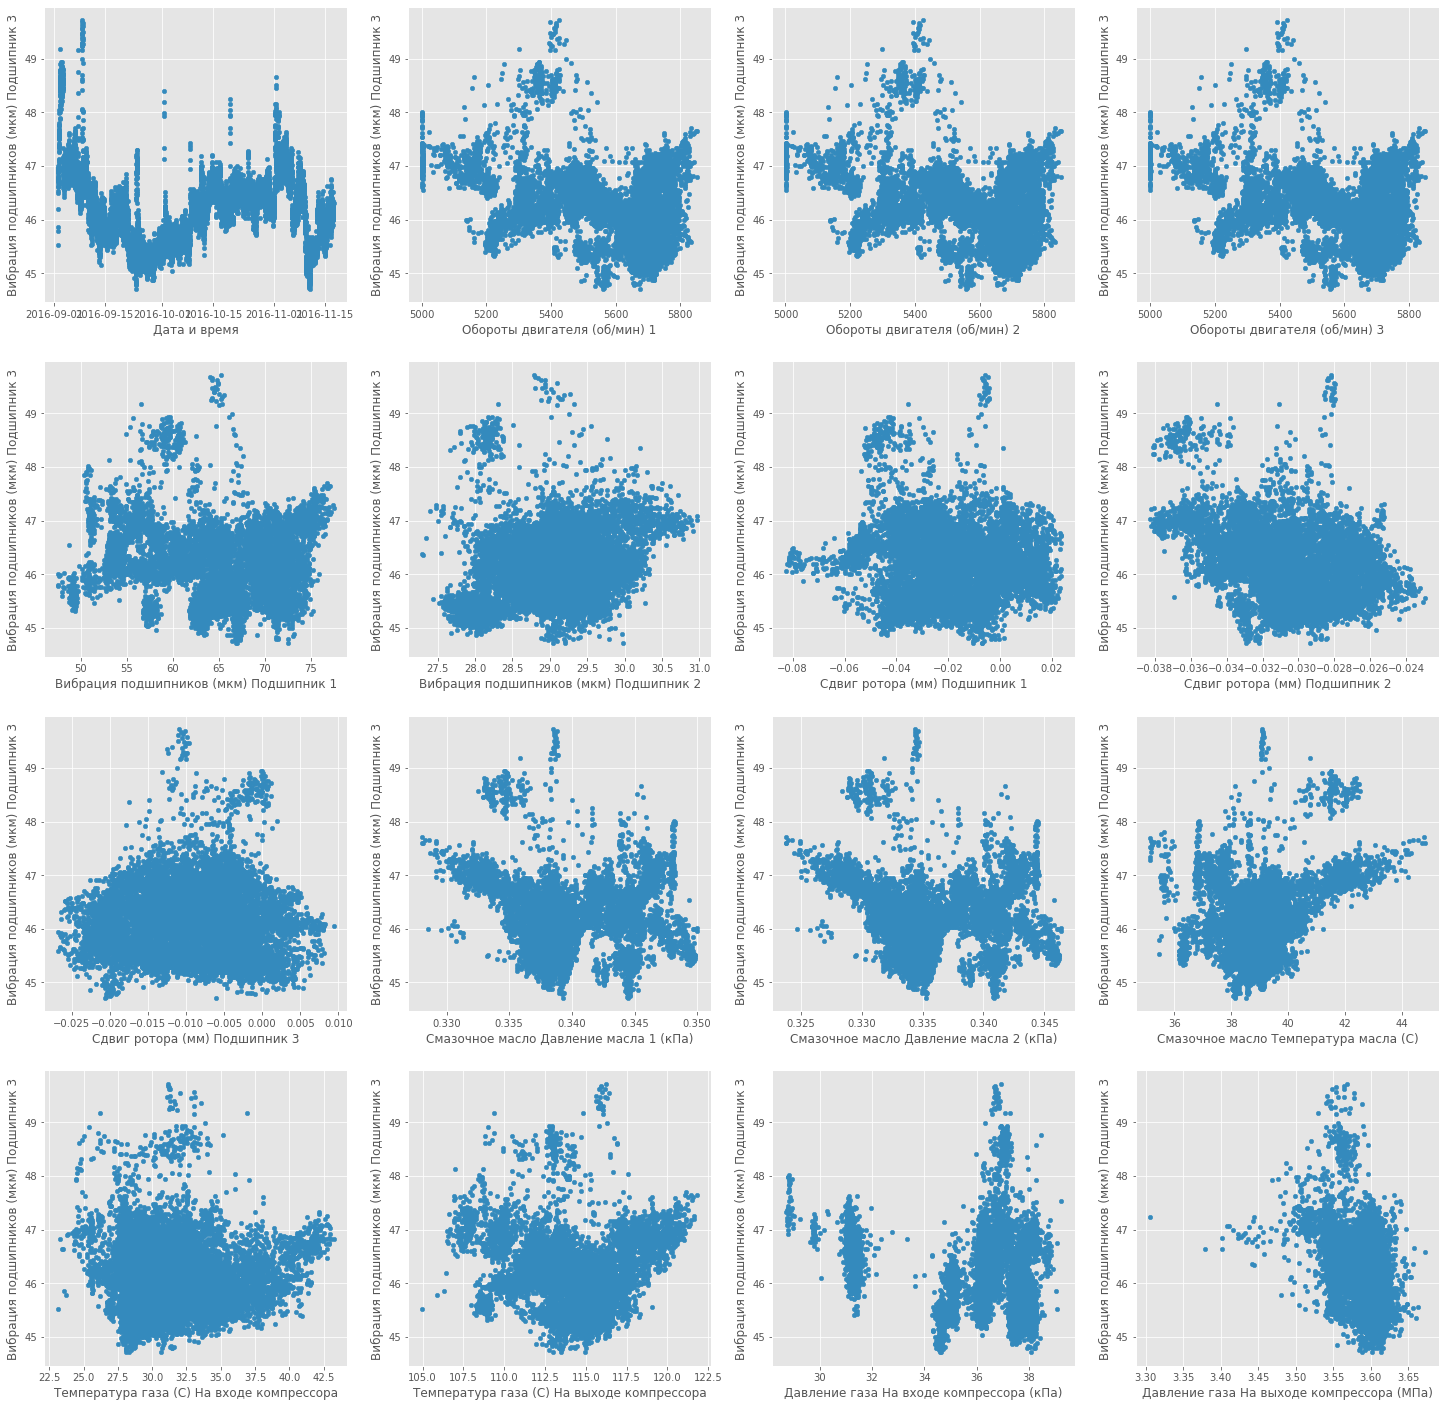

In [87]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(25, 25))
for idx, feature in enumerate(data.columns[:-1]):
    data.plot(feature, "Вибрация подшипников (мкм) Подшипник 3", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

In [88]:
data[['Обороты двигателя (об/мин) 1', 'Обороты двигателя (об/мин) 2', 'Обороты двигателя (об/мин) 3', 'Вибрация подшипников (мкм) Подшипник 3','Сдвиг ротора (мм) Подшипник 1','Сдвиг ротора (мм) Подшипник 2','Сдвиг ротора (мм) Подшипник 3','Смазочное масло Давление масла 1 (кПа)','Смазочное масло Давление масла 2 (кПа)','Смазочное масло Температура масла (С)','Температура газа (С) На входе компрессора','Температура газа (С) На выходе компрессора','Давление газа На входе компрессора (кПа)','Давление газа На выходе компрессора (МПа)']].corr()

,Обороты двигателя (об/мин) 1,Обороты двигателя (об/мин) 2,Обороты двигателя (об/мин) 3,Вибрация подшипников (мкм) Подшипник 3,Сдвиг ротора (мм) Подшипник 1,Сдвиг ротора (мм) Подшипник 2,Сдвиг ротора (мм) Подшипник 3,Смазочное масло Давление масла 1 (кПа),Смазочное масло Давление масла 2 (кПа),Смазочное масло Температура масла (С),Температура газа (С) На входе компрессора,Температура газа (С) На выходе компрессора,Давление газа На входе компрессора (кПа),Давление газа На выходе компрессора (МПа)
Обороты двигателя (об/мин) 1,1.000000,0.999995,0.999997,-0.419660,0.117735,0.229097,-0.304268,-0.824779,-0.825609,0.571267,0.437760,0.897604,0.659091,0.871948
Обороты двигателя (об/мин) 2,0.999995,1.000000,0.999997,-0.419790,0.117549,0.228930,-0.304149,-0.824742,-0.825563,0.571276,0.437628,0.897557,0.659027,0.871966
Обороты двигателя (об/мин) 3,0.999997,0.999997,1.000000,-0.419727,0.117647,0.229007,-0.304201,-0.824734,-0.825561,0.571268,0.437702,0.897586,0.659054,0.871951
Вибрация подшипников (мкм) Подшипник 3,-0.419660,-0.419790,-0.419727,1.000000,-0.084462,-0.387900,0.036883,-0.008422,-0.013318,0.254731,-0.086620,-0.134715,-0.216364,-0.447423
Сдвиг ротора (мм) Подшипник 1,0.117735,0.117549,0.117647,-0.084462,1.000000,0.348884,-0.149105,-0.016338,-0.027309,-0.232369,0.448700,0.133983,-0.037409,0.134053
Сдвиг ротора (мм) Подшипник 2,0.229097,0.228930,0.229007,-0.387900,0.348884,1.000000,-0.119435,0.069286,0.055805,-0.362921,0.372537,0.123076,0.407379,0.237212
Сдвиг ротора (мм) Подшипник 3,-0.304268,-0.304149,-0.304201,0.036883,-0.149105,-0.119435,1.000000,0.241226,0.247193,-0.071971,-0.042722,-0.277055,-0.225204,-0.269437
Смазочное масло Давление масла 1 (кПа),-0.824779,-0.824742,-0.824734,-0.008422,-0.016338,0.069286,0.241226,1.000000,0.999622,-0.822657,-0.359029,-0.852959,-0.542818,-0.659958
Смазочное масло Давление масла 2 (кПа),-0.825609,-0.825563,-0.825561,-0.013318,-0.027309,0.055805,0.247193,0.999622,1.000000,-0.819466,-0.370220,-0.856853,-0.549617,-0.660510
Смазочное масло Температура масла (С),0.571267,0.571276,0.571268,0.254731,-0.232369,-0.362921,-0.071971,-0.822657,-0.819466,1.000000,0.186535,0.720929,0.330581,0.404391


In [89]:
from sklearn.utils import shuffle
X = shuffle(X, random_state=123)
y = shuffle(y, random_state=123)

from sklearn.model_selection import train_test_split
X_train_data, X_test_data, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)

In [90]:
X_train= X_train_data.drop('Дата и время',1)
X_test= X_test_data.drop('Дата и время',1)
X_train.head()

,Обороты двигателя (об/мин) 1,Обороты двигателя (об/мин) 2,Обороты двигателя (об/мин) 3,Сдвиг ротора (мм) Подшипник 1,Сдвиг ротора (мм) Подшипник 2,Сдвиг ротора (мм) Подшипник 3,Смазочное масло Давление масла 1 (кПа),Смазочное масло Давление масла 2 (кПа),Смазочное масло Температура масла (С),Температура газа (С) На входе компрессора,Температура газа (С) На выходе компрессора,Давление газа На входе компрессора (кПа),Давление газа На выходе компрессора (МПа)
6915,5379.280553,5379.504387,5376.745605,-0.013278,-0.030210,0.002733,0.343150,0.339472,38.581543,34.041443,111.351256,36.232131,3.563750
9350,5244.352192,5245.316516,5242.008459,-0.009360,-0.033872,0.000516,0.345744,0.342160,37.687378,29.830048,110.157643,31.178403,3.551196
5710,5349.873877,5350.044748,5347.314444,-0.004213,-0.036255,-0.014631,0.341005,0.337292,38.173472,25.601766,112.447615,36.221540,3.512802
4205,5739.131639,5739.339199,5736.787898,-0.055298,-0.030208,-0.018087,0.337478,0.333618,39.160156,29.912383,115.990804,35.991638,3.611859
348,5747.159810,5748.124224,5744.270849,-0.038470,-0.037605,-0.006630,0.332548,0.328443,41.966197,30.577942,118.143010,37.098100,3.600025


In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
linearregressor = LinearRegression()
linearregressor.fit(X_train, y_train)
['{1} : {0}'.format(a, b) for a, b in zip(linearregressor.coef_, X_train.columns)]

['Обороты двигателя (об/мин) 1 : -0.007174464554476597',
 'Обороты двигателя (об/мин) 2 : -0.016077672046241106',
 'Обороты двигателя (об/мин) 3 : 0.01728512117464687',
 'Сдвиг ротора (мм) Подшипник 1 : 1.6138981058264754',
 'Сдвиг ротора (мм) Подшипник 2 : -33.06349974375497',
 'Сдвиг ротора (мм) Подшипник 3 : -8.808057119008426',
 'Смазочное масло Давление масла 1 (кПа) : 927.9647680755327',
 'Смазочное масло Давление масла 2 (кПа) : -987.1239041348291',
 'Смазочное масло Температура масла (С) : 0.15298896149692823',
 'Температура газа (С) На входе компрессора : 0.010737080092727514',
 'Температура газа (С) На выходе компрессора : 0.1284843798712116',
 'Давление газа На входе компрессора (кПа) : 0.060211793598457214',
 'Давление газа На выходе компрессора (МПа) : 0.2709552281520154']

In [93]:
linearregressor.intercept_

70.5232281327267

In [94]:
y_train_pred = linearregressor.predict(X_train)
y_test_pred = linearregressor.predict(X_test)
from sklearn.metrics import  mean_squared_error, r2_score, mean_absolute_error

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('MAE train: {:.3f}, test: {:.3f}'.format(
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.118, test: 0.124
MAE train: 0.270, test: 0.279
R^2 train: 0.722, test: 0.718


Для подшипника 3 модель линейно регрессии гораздо лучше предсказывает зависимость, чем для подшипника 2. Качество модели близко к качеству в случае самой первой модели для подшипника 1. 

In [95]:
print (y_test)

2468    46.117967
1763    45.761275
4547    45.291838
7490    46.324739
3989    45.433943
          ...    
4129    45.357141
1988    45.676279
2250    45.872040
7321    46.457423
1455    46.353980
Name: Вибрация подшипников (мкм) Подшипник 3, Length: 3302, dtype: float64


In [96]:
y_test_pred = pd.DataFrame(data=y_test_pred)
print (y_test_pred)

              0
0     45.657863
1     45.713429
2     45.671105
3     46.191841
4     45.430959
...         ...
3297  45.459230
3298  45.510269
3299  46.004534
3300  46.192003
3301  46.474215

[3302 rows x 1 columns]


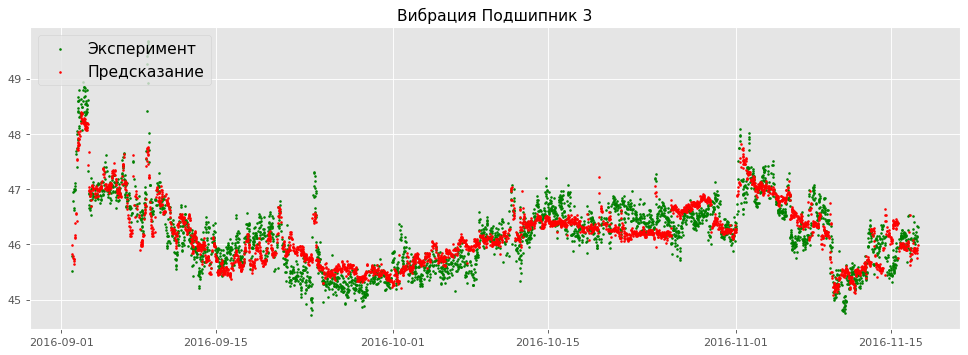

In [97]:
import matplotlib.pylab as plt
plt.figure(figsize=(15,5), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
plt.scatter(X_test_data['Дата и время'], y_test, color = 'green', label = 'Эксперимент', s = 3)
plt.scatter(X_test_data['Дата и время'], y_test_pred, color = 'red', label = 'Предсказание', s=3)
plt.title('Вибрация Подшипник 3', fontsize=14)
plt.legend(loc=2, prop={'size': 14})
plt.show()

Выбранное alpha: 0.01
['Обороты двигателя (об/мин) 1 : -0.005147785818035632', 'Обороты двигателя (об/мин) 2 : -0.00028439120035970023', 'Обороты двигателя (об/мин) 3 : -0.0', 'Сдвиг ротора (мм) Подшипник 1 : 0.0', 'Сдвиг ротора (мм) Подшипник 2 : -0.0', 'Сдвиг ротора (мм) Подшипник 3 : -0.0', 'Смазочное масло Давление масла 1 (кПа) : -0.0', 'Смазочное масло Давление масла 2 (кПа) : -0.0', 'Смазочное масло Температура масла (С) : 0.2966011052143797', 'Температура газа (С) На входе компрессора : 0.019238734619293627', 'Температура газа (С) На выходе компрессора : 0.1708365318102267', 'Давление газа На входе компрессора (кПа) : 0.06673619237452774', 'Давление газа На выходе компрессора (МПа) : -0.0']


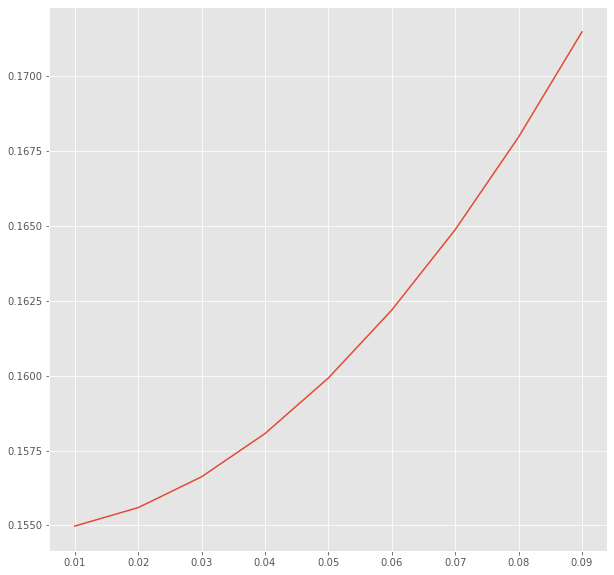

In [100]:
from sklearn.linear_model import LassoCV
alphas = np.arange(0.01, 0.1, 0.01)
lassocv_model = LassoCV(alphas=alphas)
lassocv_model.fit(X_train, y_train)
plt.figure(figsize=(10, 10))
p = plt.plot(lassocv_model.alphas_, lassocv_model.mse_path_.mean(axis=1))
ax = plt.axes()
print ('Выбранное alpha: {0}'.format(lassocv_model.alpha_))
zip(lassocv_model.coef_, X_train.columns)
print(['{1} : {0}'.format(a, b) for a, b in zip(lassocv_model.coef_, X_train.columns)])

In [101]:
from sklearn.linear_model import Lasso
lasso_regressor = Lasso(alpha=0.01,random_state = 0)
lasso_regressor.fit(X_train, y_train)
lasso_predictions = lasso_regressor.predict(X_test)

In [102]:
from sklearn import model_selection, metrics
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)
lasso_scoring = model_selection.cross_val_score(lasso_regressor, X_train, y_train, scoring = scorer, cv = 10)
print('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 0.3019848859479775, std: 0.005834465165534161


In [103]:
print(lasso_regressor.coef_)

[-5.14778582e-03 -2.84391200e-04 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  2.96601105e-01  1.92387346e-02  1.70836532e-01  6.67361924e-02
 -0.00000000e+00]


In [104]:
X=X.drop('Дата и время',1)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
X_std, y, test_size=0.3, random_state=0)

In [105]:
df1=pd.DataFrame(data=X_train_scaled)
df1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,7702.000000,7702.000000,7702.000000,7702.000000,7702.000000,7702.000000,7702.000000,7702.000000,7702.000000,7702.000000,7702.000000,7702.000000,7702.000000
mean,0.006568,0.006582,0.006567,-0.008861,-0.003323,0.002655,-0.008937,-0.008767,0.009819,0.008119,0.007932,0.008619,0.001510
std,1.000780,1.000793,1.000790,0.998400,0.994291,0.999781,1.001575,1.001628,1.005421,0.999666,1.004323,0.993168,0.998334
min,-3.085688,-3.082888,-3.082420,-3.352325,-2.705388,-2.612048,-3.114504,-3.109839,-3.337497,-2.441301,-3.055702,-3.858432,-11.190569
25%,-0.526466,-0.526279,-0.525748,-0.693520,-0.654808,-0.702098,-0.604162,-0.591348,-0.526103,-0.733971,-0.564047,0.003914,-0.500990
50%,0.256470,0.255163,0.254948,-0.072062,-0.038640,0.054684,-0.324822,-0.324786,0.019213,-0.178002,-0.013212,0.140932,0.216616
75%,0.796777,0.797549,0.797534,0.691191,0.698259,0.725164,0.729253,0.742298,0.387981,0.563653,0.579490,0.675851,0.701590
max,1.680627,1.682232,1.679982,2.367142,2.741477,2.785659,2.629948,2.596628,4.985278,3.541988,3.041669,1.646207,2.811358


In [106]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth = 10, random_state = 1)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, random_state=1)

In [107]:
y_train_pred_forest = rf.predict(X_train_scaled)
y_test_pred_forest = rf.predict(X_test_scaled)

In [108]:
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred_forest),
        mean_squared_error(y_test, y_test_pred_forest)))
print('MAE train: {:.3f}, test: {:.3f}'.format(
        mean_absolute_error(y_train, y_train_pred_forest),
        mean_absolute_error(y_test, y_test_pred_forest)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred_forest),
        r2_score(y_test, y_test_pred_forest)))

MSE train: 0.024, test: 0.037
MAE train: 0.117, test: 0.144
R^2 train: 0.944, test: 0.916


Лучше для подшипника 3 работает и модель случайного леса. Переобучение меньше. 

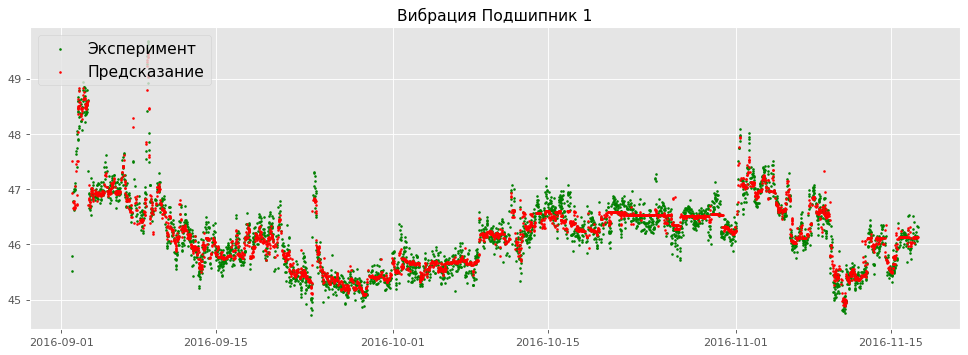

In [109]:
import matplotlib.pylab as plt
plt.figure(figsize=(15,5), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
plt.scatter(X_test_data['Дата и время'], y_test, color = 'green', label = 'Эксперимент', s = 3)
plt.scatter(X_test_data['Дата и время'], y_test_pred_forest, color = 'red', label = 'Предсказание', s=3)
plt.title('Вибрация Подшипник 1', fontsize=14)
plt.legend(loc=2, prop={'size': 14})
plt.show()

Text(0.5, 0, 'Difference of absolute errors')

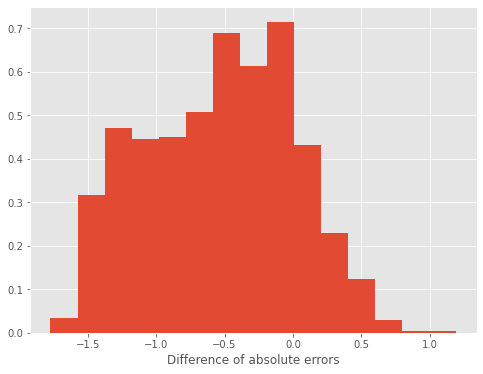

In [110]:
plt.figure(figsize(8,6))
plt.hist(abs(y_test - linearregressor.predict(X_test)) - abs(y_test - rf.predict(X_test)), bins=15, density=True)
plt.xlabel('Difference of absolute errors')

In [111]:
import statsmodels.stats.api as sm
tmeans = sm.CompareMeans(sm.DescrStatsW(abs(y_test - linearregressor.predict(X_test))), sm.DescrStatsW(abs(y_test - rf.predict(X_test_scaled))))

tmeans.ttest_ind(alternative='two-sided', usevar='pooled', value=0)[1]

5.307956836451208e-198

Отвергаем нулевую гипотезу на всех уровнях значимости. Средние значения для разности абсолютных ошибок отличаются. Построим для них 95% доверительный интервал:

In [112]:
tmeans.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled')

(0.12672537299865025, 0.1437899340892618)

То есть, используя вместо линейной регрессии наш случайный лес, мы предсказываем вибрацию в среднем на 0.13-0.14 микрометров точнее.

Давайте посмотрим, какие признаки обладают наибольшей предсказательной способностью:

In [115]:
importances = pd.DataFrame(zip(X.columns, rf.feature_importances_))
importances.columns = ['feature name', 'importance']
importances.sort_values(by='importance', ascending=False)

,feature name,importance
8,Смазочное масло Температура масла (С),0.206349
10,Температура газа (С) На выходе компрессора,0.149368
1,Обороты двигателя (об/мин) 2,0.140581
2,Обороты двигателя (об/мин) 3,0.133839
11,Давление газа На входе компрессора (кПа),0.084389
7,Смазочное масло Давление масла 2 (кПа),0.066963
0,Обороты двигателя (об/мин) 1,0.053530
12,Давление газа На выходе компрессора (МПа),0.040149
3,Сдвиг ротора (мм) Подшипник 1,0.035639
5,Сдвиг ротора (мм) Подшипник 3,0.026241


По мнению автора работы, в данном случае коэффициенты полученные в модели случайного леса более физичны и внушают большее доверие, чем в случае предсказания вибрации для подшипника 1. Однако для более взвешенной оценки, нужны дальнейшие исследования.